In [ ]:
# %load fonts.py
#!/usr/bin/env python

# In[ ]:


# matplotlib 한글 폰트 문제 해결
from matplotlib import rc
import platform 

if platform.system() == 'Darwin':   # Mac 환경 폰트 지정
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    rc('font', family='Malgun Gothic')
    
plt.rc('axes', unicode_minus=False)



In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
titanic = sns.load_dataset('titanic')
titanic.head()
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


C:\Users\admin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49440 (\N{HANGUL SYLLABLE SEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\admin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 54805 (\N{HANGUL SYLLABLE HYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\admin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 54924 (\N{HANGUL SYLLABLE HOE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\admin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44480 (\N{HANGUL SYLLABLE GWI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\admin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\admin\anaconda

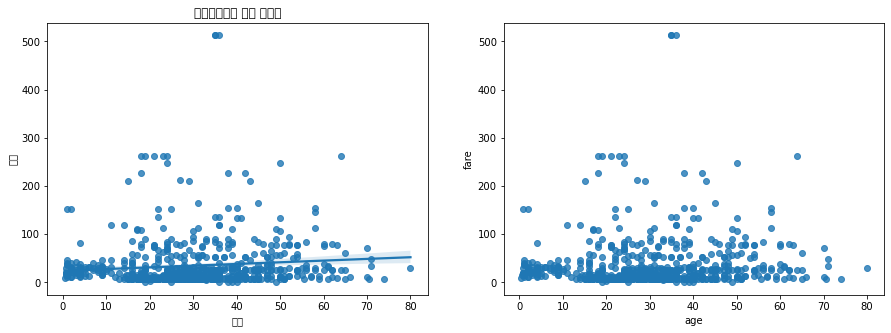

In [31]:
# seaborn을 활용하여 회귀선이 있는 산점도 그리기
fig = plt.figure(figsize=(15,5))

ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

# 선형회귀선표시
sns.regplot(x='age',  # x축변수
            y='fare', # y축변수
            data=titanic,  # 데이터
            ax =ax1) # regplot은 기본값으로 x축과 y를 넣어줘야함 

# 선형회귀선표시 안함 -> fig_reg = False
sns.regplot(x='age',
           y='fare',
           data=titanic,
           ax=ax2,
           fit_reg=False)

ax1.set_title('선형회귀선이 있는 그래프')
ax1.set_xlabel('나이')
ax1.set_ylabel('요금')

plt.show()

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2211: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


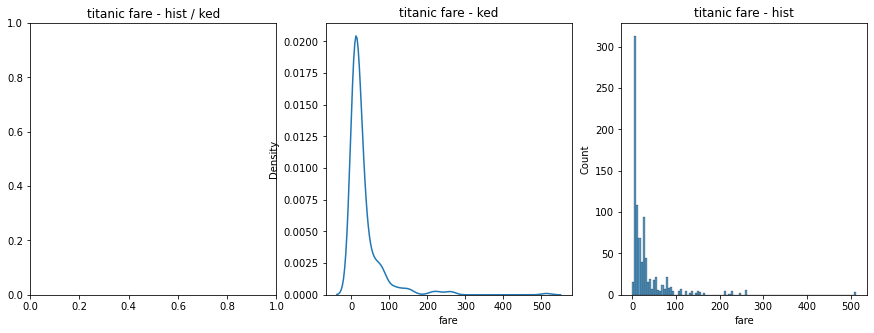

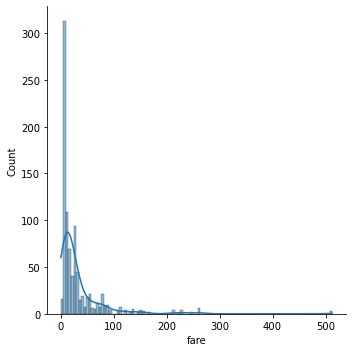

In [28]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

# displot 
sns.displot(data=titanic, x='fare',kde=True, ax=ax1)

# kdeplot
sns.kdeplot(x='fare', data = titanic, ax=ax2)

#hisplot
sns.histplot (x='fare', data = titanic, ax =ax3)

ax1.set_title('titanic fare - hist / ked')
ax2.set_title('titanic fare - ked')
ax3.set_title('titanic fare - hist')

plt.show()


In [8]:
# 히트맵
table = titanic.pivot_table(index=['sex'], columns=['class'],
                           aggfunc='size')
table

class,First,Second,Third
sex,,,
female,94,76,144
male,122,108,347


In [14]:
titanic['class'].unique()
titanic.sex.unique()

array(['male', 'female'], dtype=object)

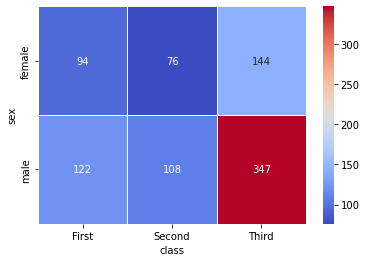

In [16]:
sns.heatmap(table,
           annot=True, fmt='d',  # 가로에 값을 집어넣음, fmt='d'는 그룹함수의 결과를 표시(정수로)
           cmap='coolwarm',       # 원하는 컬러 멥
           linewidths=.5,        # 구분선의 사이즈
           cbar=True)

plt.show()```

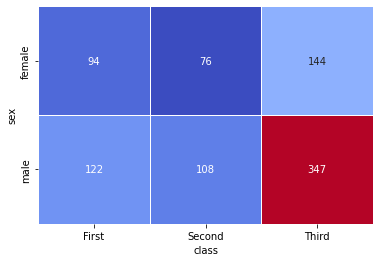

In [18]:
sns.heatmap(table,
           annot=True, fmt='d',  # 상자안에 있는 숫자를 보이게
           cmap='coolwarm',       
           linewidths=.5,       
           cbar=False)               # 컬러바가 안보이게 할 수 있음
 
plt.show()

In [32]:
print(sns.__version__)

0.11.2


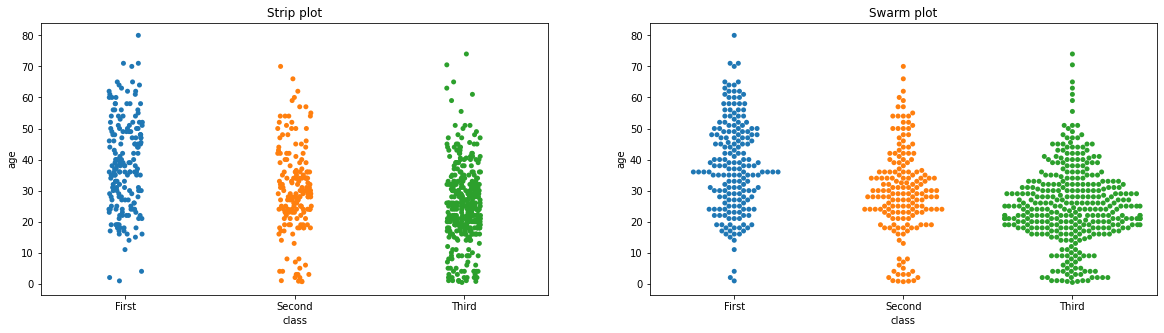

In [37]:
# 범주형 데이터 산점도
fig = plt.figure(figsize=(20, 5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
# 이산형 변수의 분포, 데이퍼 분산 미 고려(중복 표시 O)
sns.stripplot(x='class',
             y= 'age',
             data= titanic,
             ax = ax1)
sns.swarmplot(x='class',
             y= 'age',
              size=5,
             data= titanic,
             ax = ax2)

ax1.set_title('Strip plot')
ax2.set_title('Swarm plot')
plt.show()        

<AxesSubplot:xlabel='sex', ylabel='survived'>

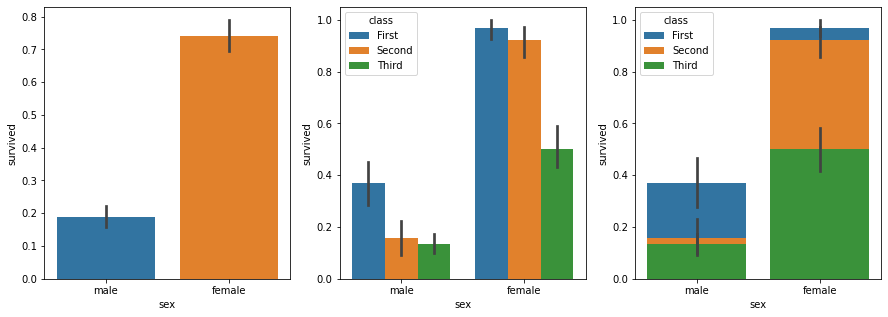

In [40]:
# 막대 그래프 : barplot()
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

sns.barplot(x='sex', y='survived', data=titanic, ax=ax1)
sns.barplot(x='sex', y='survived', data=titanic, hue='class', ax=ax2)
sns.barplot(x='sex', y='survived', data=titanic, hue='class',
            dodge=False, ax=ax3)

In [39]:
titanic.sex.unique()

array(['male', 'female'], dtype=object)

AttributeError: 'Figure' object has no attribute 'subtitle'

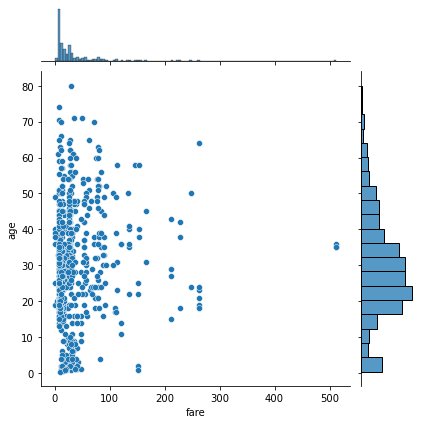

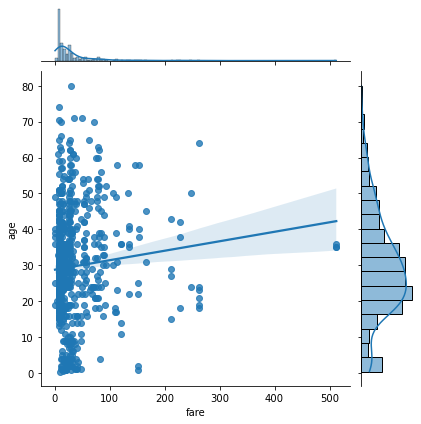

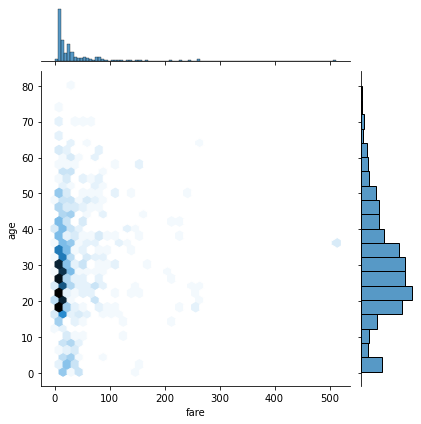

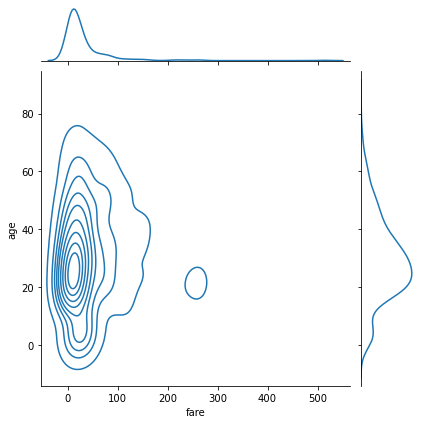

In [43]:
# 조인트 그래프 : jointplot() -> 산점도를 기본, x-y축에 변수에 대한 히스토그램 표시

# 기본 조인트
j1 = sns.jointplot(x='fare', y='age', data=titanic)
# 회귀선
j2 = sns.jointplot(x='fare', y='age', data=titanic, kind='reg')
# 조인트 육각 그래프
j3 = sns.jointplot(x='fare', y='age', data=titanic, kind='hex')
# 조인트 커널 밀집 그래프
j4 = sns.jointplot(x='fare', y='age', data=titanic, kind='kde')

j1.fig.subtitle('titanic fare - scatter')
j2.fig.subtitle('titanic fare - reg')
j3.fig.subtitle('titanic fare - hex')
j4.fig.subtitle('titanic fare - ked')
plt.show